## Assignment 5.2
## Support vector machines

The goal of this task is to visualize two-dimensional decision boundaries, margins and support vectors for linear and kernel SVMs in case of hard and soft margins.

Generate a dataset (use the functions ```sklearn.datasets.make_blobs``` and ```sklearn.datasets.make_circles``` for the linear and the kernel SVM cases respectively). 

Fit an SVM using ```sklearn.svm.svc```, use ```kernel=linear``` or ```kernel=rbf``` parameter to specify the kernel and the parameter ```C``` to specify whether the margin is soft or hard. Visualize the decision boundary by using the function ```model.decision_function``` and make a scatter plot of the support vectors found in ```model.support_vectors_```. In order to visualize the decision boundary, one option might be to generate a two-dimensional grid using ```np.meshgrid``` and then plot it for selected iso-contours at $f(x)=\{-1,0,1\}$ levels which corresponds to the margin and the decision boundary. A useful function for plotting iso-contours is ```matplotlib.pyplot.contour```.

You are expected to produce 4 plots (hard and soft margin for the linear and RBF cases) similar to the examples below.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [1]:
from sklearn.datasets.samples_generator import make_blobs
#X, y = make_blobs(...)



In [2]:
from sklearn.svm import SVC # "Support vector classifier"
#model = SVC(kernel=, C=)


In [4]:
def plot_svc_decision_function(model, ax=None):

    

/Users/Kuzmin/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/Kuzmin/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/Kuzmin/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


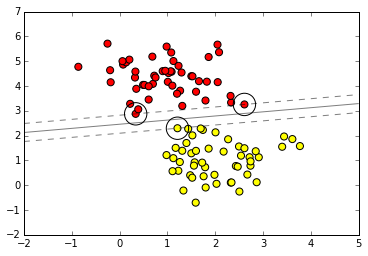

In [5]:
plt.scatter();

plot_decision_function(model);

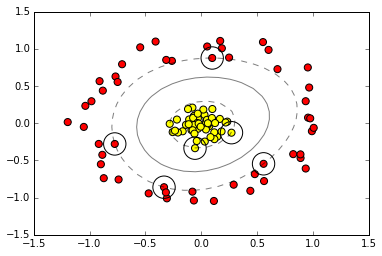

In [16]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles()

plot_svc_decision_function();